In [5]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

## Qustion 2

In [6]:
## the input file is .csv,so the corresponding delimeter is ','.
def cardinality_items(file):
    with open(file,'r') as f:
        lines = f.readlines()
        col_name = set([])
        for l in lines:
            res = l.split(',')
            for i in range(len(res)):
                res[i] = res[i].strip()
            col_name = col_name | set(res)
    f.close()
    return len(col_name),col_name
print(cardinality_items('sample data/basket_data.csv')[0])

21


In [7]:
def all_itemsets(filename):
    M,col_name = cardinality_items(filename)
    res = []
    for i in range(1,M+1):
        comb = combinations(col_name,i)
        comb = [list(val) for val in comb]
        res.append(comb)
    return res
all_itemsets('sample data/basket_data.csv')[1]

[['pork', 'leeks'],
 ['pork', 'sausages'],
 ['pork', 'tomotes'],
 ['pork', 'macaroni'],
 ['pork', 'squid'],
 ['pork', 'asparagus'],
 ['pork', 'beer'],
 ['pork', 'chips'],
 ['pork', 'butter'],
 ['pork', 'spaghetti'],
 ['pork', 'raisins'],
 ['pork', 'salmon'],
 ['pork', 'corn'],
 ['pork', 'beans'],
 ['pork', 'okra'],
 ['pork', 'ketchup'],
 ['pork', 'spinach'],
 ['pork', 'diapers'],
 ['pork', 'milk'],
 ['pork', 'bread'],
 ['leeks', 'sausages'],
 ['leeks', 'tomotes'],
 ['leeks', 'macaroni'],
 ['leeks', 'squid'],
 ['leeks', 'asparagus'],
 ['leeks', 'beer'],
 ['leeks', 'chips'],
 ['leeks', 'butter'],
 ['leeks', 'spaghetti'],
 ['leeks', 'raisins'],
 ['leeks', 'salmon'],
 ['leeks', 'corn'],
 ['leeks', 'beans'],
 ['leeks', 'okra'],
 ['leeks', 'ketchup'],
 ['leeks', 'spinach'],
 ['leeks', 'diapers'],
 ['leeks', 'milk'],
 ['leeks', 'bread'],
 ['sausages', 'tomotes'],
 ['sausages', 'macaroni'],
 ['sausages', 'squid'],
 ['sausages', 'asparagus'],
 ['sausages', 'beer'],
 ['sausages', 'chips'],
 ['sa

In [8]:
def prob_S(S,D):
    count = 0
    for val in D:
        if set(S)==(set(val)):
            count = count + 1
    return count/len(D)

## Question 3

In [9]:
def data_merge(file_list):
    res = pd.DataFrame()
    for file in file_list:
        df = pd.read_csv(file,names=['user_id', 'rating', 'date'])
        res = pd.concat([res,df])
    res['movie_id']= res['user_id'].apply(lambda x:x[:-1] if x[-1]==':' else None)
    res['movie_id'] = res['movie_id'].fillna(method='ffill')
    res.dropna(subset=['date'],inplace=True)
    return res

In [10]:
file_list = ['combined_data_1.txt','combined_data_2.txt',\
             'combined_data_3.txt','combined_data_4.txt']
df = data_merge(file_list)

In [11]:
df.head()

,user_id,rating,date,movie_id
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1
5,823519,3.0,2004-05-03,1


In [12]:
df['user_id'].astype(int).min(),df['user_id'].astype(int).max()

(6, 2649429)

In [13]:
df['rating'].min(),df['rating'].max()

(1.0, 5.0)

In [14]:
df['movie_id'].astype(int).min(),df['movie_id'].astype(int).max()

(1, 17770)

In [15]:
df.shape

(100480507, 4)

In [16]:
rating_time = df[['rating','date']].groupby('date').mean()
rating_time.head()

,rating
date,
1999-11-11,3.428571
1999-12-06,3.333333
1999-12-08,3.655172
1999-12-09,3.487500
1999-12-10,3.666667


<Figure size 1440x576 with 0 Axes>

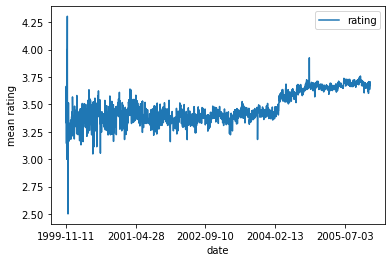

In [17]:
plt.figure(figsize=(20,8))
rating_time.plot(kind='line')
plt.ylabel('mean rating')
plt.show()

In [26]:
movie_rating_time = df[['rating','movie_id']]
movie_rating_time['year'] = pd.to_datetime(df['date']).dt.year
movie_rating_time.head()

/tmp/ipykernel_6235/3055239293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rating_time['year'] = pd.to_datetime(df['date']).dt.year


,rating,movie_id,year
1,3.0,1,2005
2,5.0,1,2005
3,4.0,1,2005
4,4.0,1,2005
5,3.0,1,2004


In [55]:
tmp = movie_rating_time.sort_values('year').groupby(['movie_id','year']).mean()
tmp

rating
movie_id year          
1        2004  3.587940
         2005  3.841954
10       2002  2.846154
         2003  3.208333
         2004  3.211111
...                 ...
9999     2001  1.600000
         2002  1.979167
         2003  1.828571
         2004  2.000000
         2005  2.571429

[65433 rows x 1 columns]

In [67]:
res = 0
cnt = 0
for idx in tmp.index.levels[0]:
    rating_df = tmp.loc[idx]
    mean_rating = rating_df.mean()
    first_year_rating = rating_df.iloc[0]
    res += (mean_rating > first_year_rating).astype(int)
    cnt += 1
res/cnt

rating    0.59758
dtype: float64

In [96]:
df_movie = pd.read_csv('movie_titles.csv',encoding = "latin",header=None,names=['movie_id','year','name'],usecols=[0,1,2])
df_movie['name'].duplicated().sum()

473